## **PROBLEM** **STATEMENT**

Meningkatkan keakuratan dalam menilai dan mengelola risiko kredit,sehingga dapat mengoptimalkan keputusan bisnis mereka dan mengurangi potensi
kerugian.


## **OBJECTIVE**

Mengembangkan model machine learning
yang dapat memprediksi risiko kredit (credit risk) berdasarkan
dataset yang mencakup data pinjaman yang
disetujui dan ditolak.

## **VARIABEL YANG TERSEDIA**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:

---



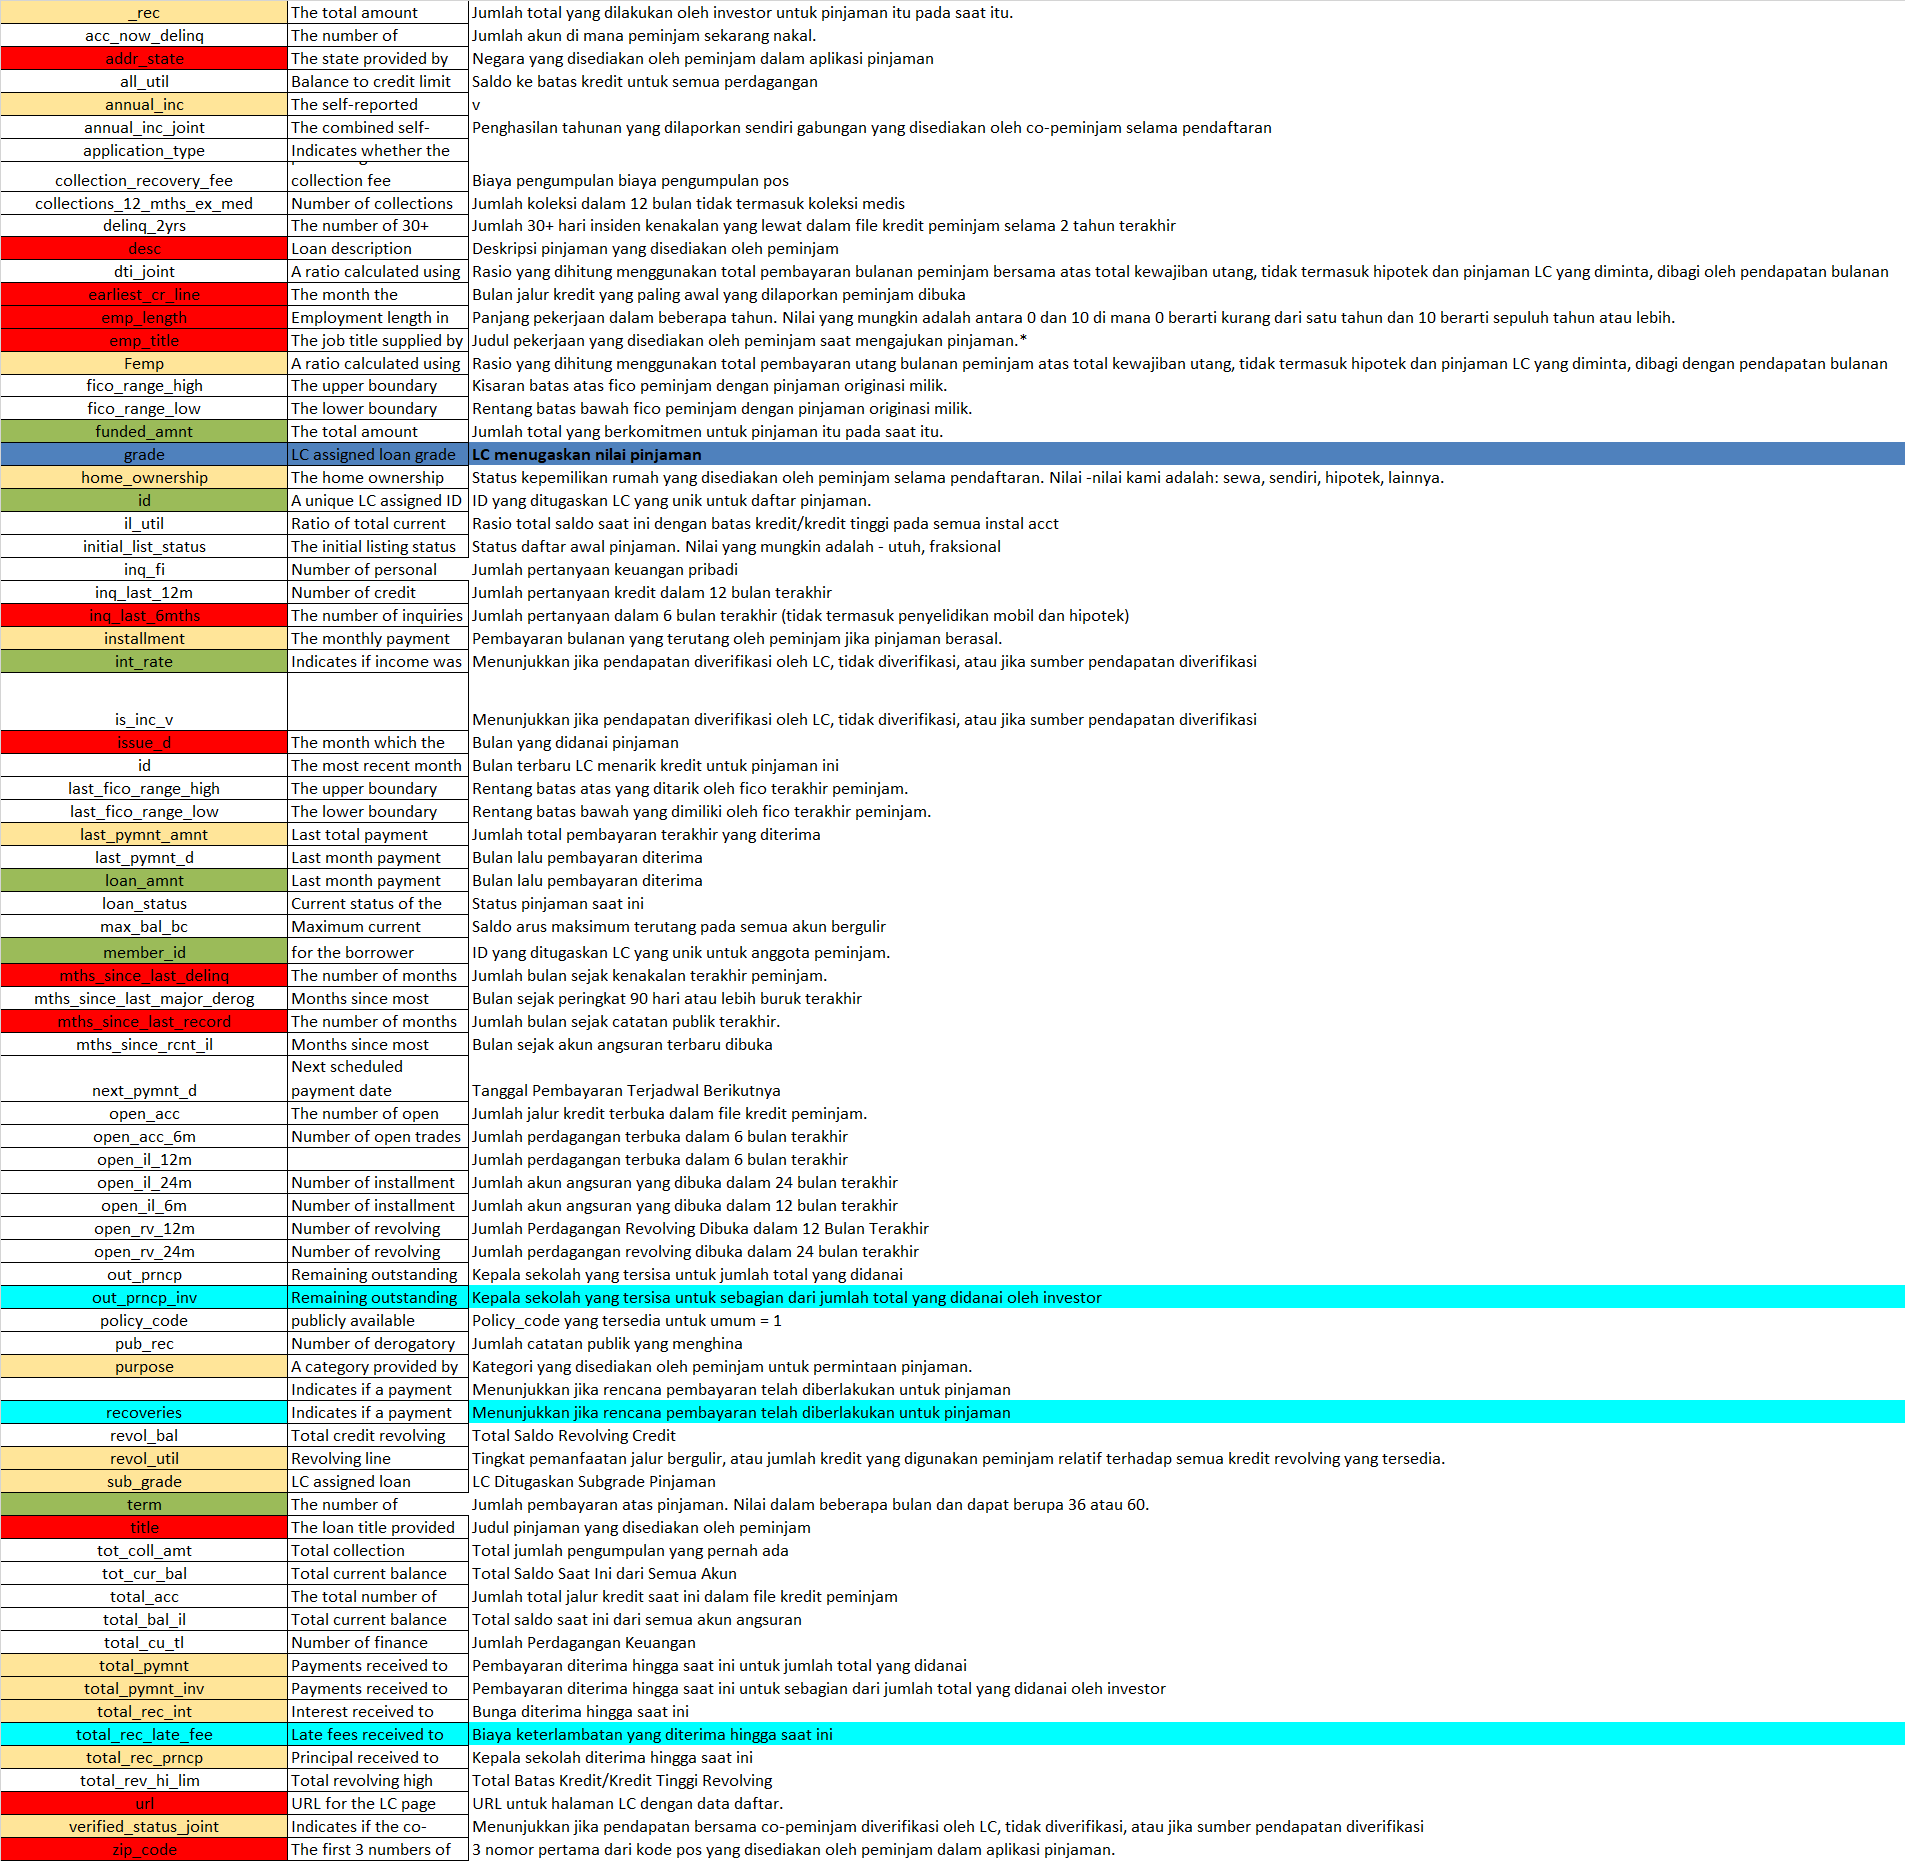

## **IMPORT PACKAGE**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

##**TAHAPAN**

 ### **Data** **Understanding**

Data Understanding
Proses yang fokus pada pengumpulan dan penilaian kualitas data. 4 tugas utama yaitu Collect Data, Describe Data, Explore Data, Verify Data Quality.

○ Analisis dataset yang diberikan dan buatlah ringkasan
tentang struktur dataset, termasuk jumlah baris dan
kolom.

○ Mengidentifikasi dan memahami setiap atribut atau kolom
data.

○ Melakukan eksplorasi awal terhadap distribusi variabel,
statistik deskriptif, dan pola umum dalam data.

In [55]:
from pandas import read_csv
data = read_csv('loan_data_2007_2014.csv')
data

<ipython-input-55-f194821f7674>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [3]:
data.axes

[RangeIndex(start=0, stop=466285, step=1),
 Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
        'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
        'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
        'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
        'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
        'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
        'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
        'collections_12_mths_ex_med', 'mths_since_last_major_derog',
        'policy_code', 'application_ty

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
data.grade.value_counts()

grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64

In [6]:
data.groupby(('term'))['term'].count()

term
 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [3]:
data['loan_status'].value_counts(normalize=True)*100

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64

Pada variabel loan_status memiliki beberapa nilai dengan definisi :
*   Current yaitu pembayaran lancar.
*   Fully Paid yaitu pembayaran penuh/lunas.
*   Charge Off yaitu hutang yang dianggap tidak dapat ditagih oleh pemberi pinjaman dan telah dihapuskan sebagai kerugian.
*  Late artinya pembayaran terlambat.
*   In Grace Period artinya masa tenggang.
*   Default artinya pembayaran macet.


### **Feature Engineering**

Proses yang melibatkan seleksi fitur, transformasi fitur, ppenciptaan fitur, dan ekstraksi fitur.

In [56]:
null_column = data.isnull().mean()
null_column[null_column==1].index

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [57]:
drop_col = ['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m']

data = data.drop(columns=drop_col, axis=1)

In [60]:
leakage_col = ['issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

data.drop(columns=leakage_col, axis=1, inplace=True)

In [61]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,f,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,f,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,f,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,f,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,f,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### **Exploratory Data Analysis (EDA)**

Proses analisis data untuk memahami karakteristik, menemukan pola, dan hubungan antar variabel. Proses EDA yaitu gambaran umum dataset, statistik deskriptif, visualisasi data.

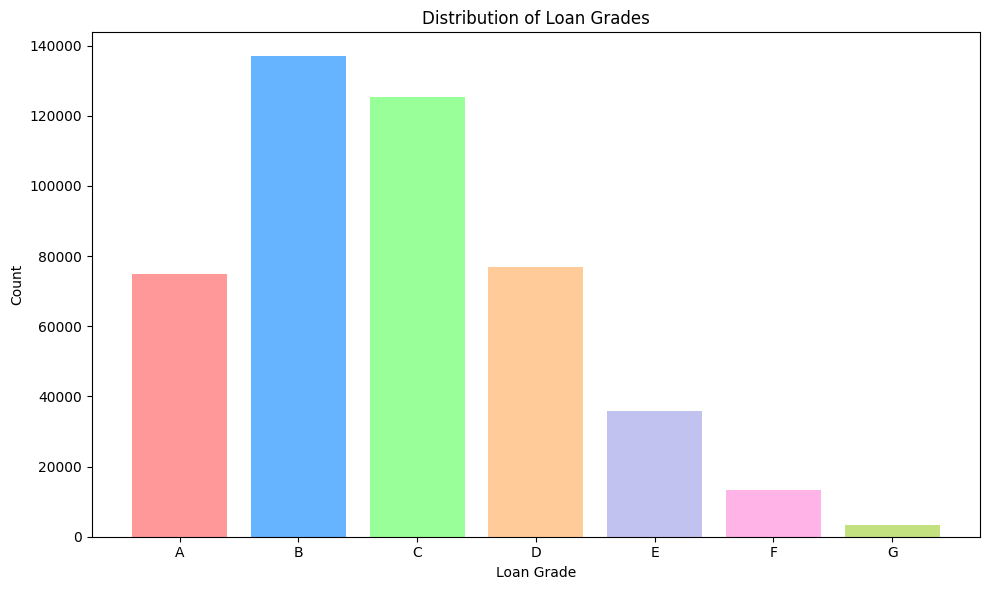

In [58]:
# Visualisasikan distribusi tingkat pinjaman
plt.figure(figsize=(10, 6))
grades_order = sorted(data['grade'].unique())
grade_counts = data['grade'].value_counts()[grades_order]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f']
plt.bar(grades_order, grade_counts, color=colors)
plt.title('Distribution of Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

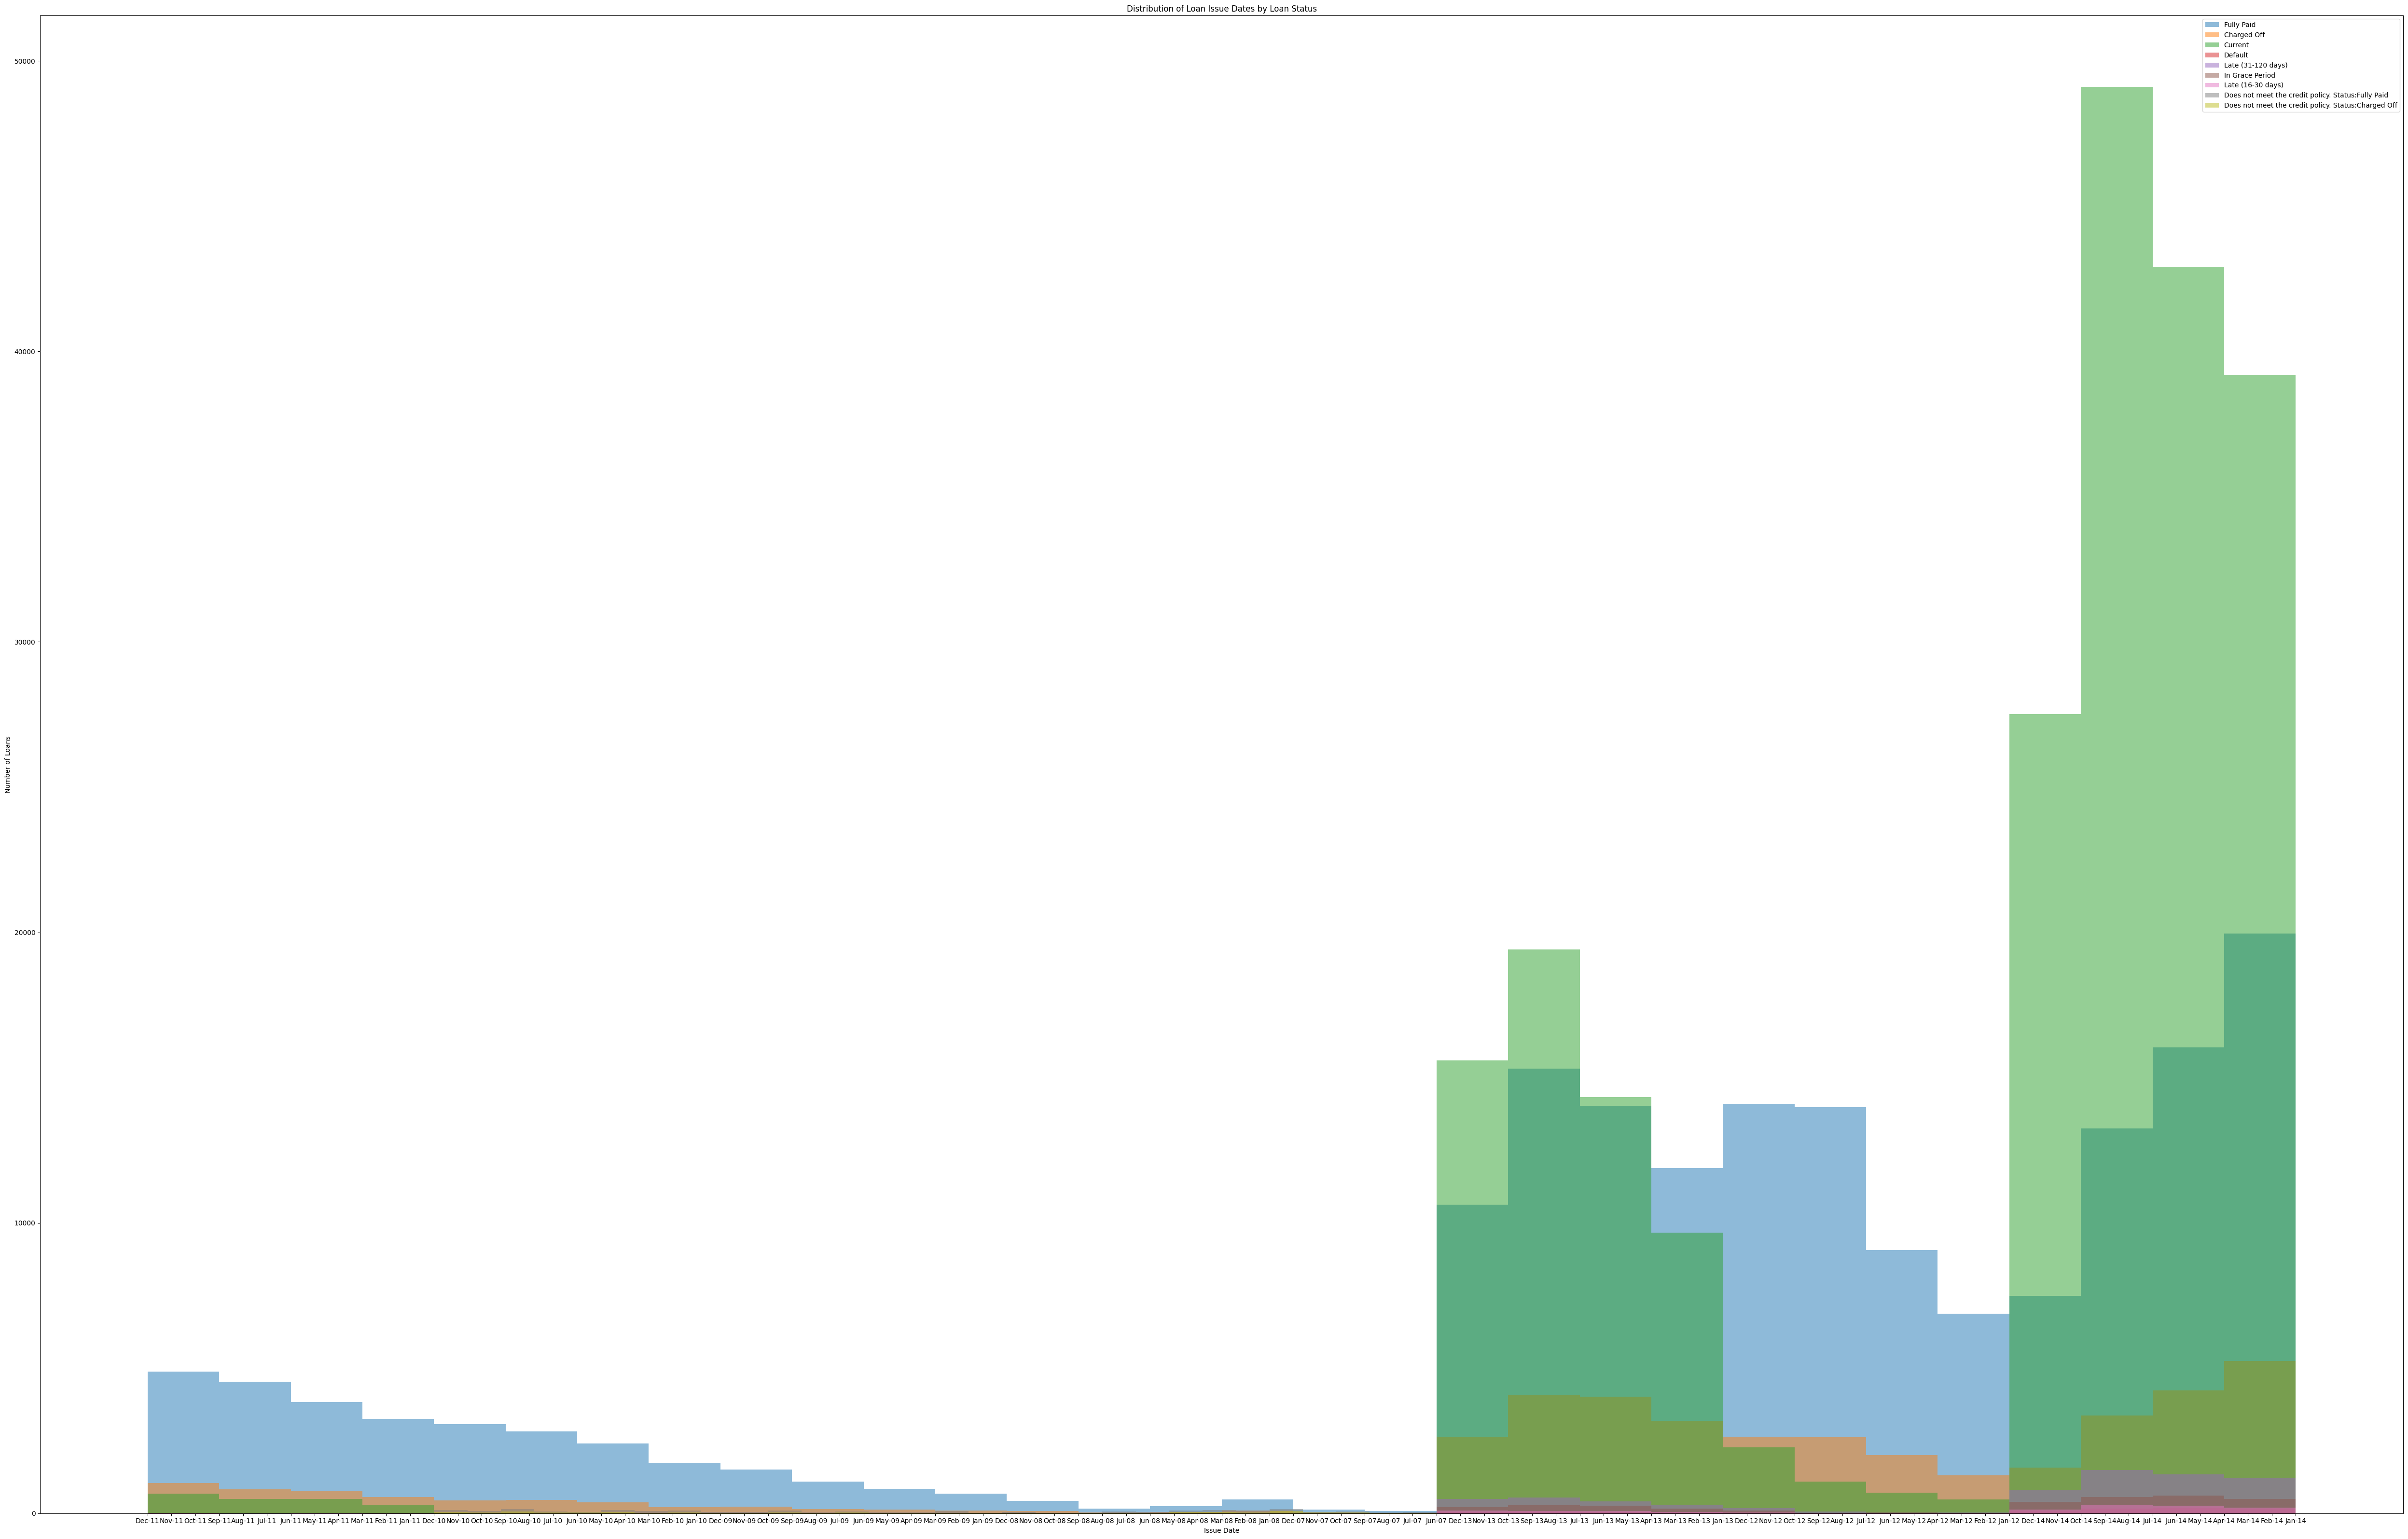

In [59]:
# Memvisualisasikan distribusi tanggal penerbitan berdasarkan status pinjaman
plt.figure(figsize=(50, 32))
loan_status_values = data['loan_status'].unique()
for status in loan_status_values:
    plt.hist(data[data['loan_status'] == status]['issue_d'], bins=30, alpha=0.5, label=status)
plt.title('Distribution of Loan Issue Dates by Loan Status')
plt.xlabel('Issue Date')
plt.ylabel('Number of Loans')
plt.legend()
plt.tight_layout()
plt.show()

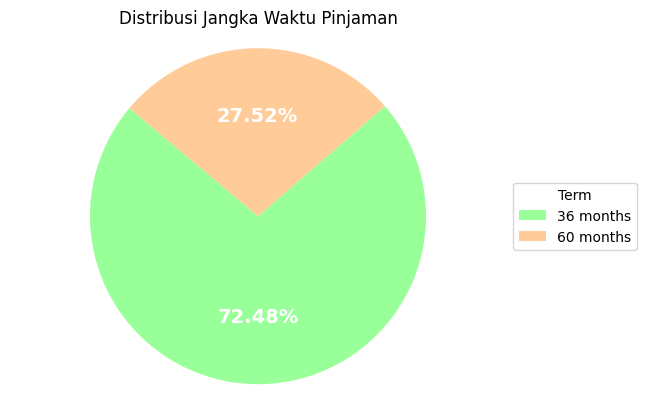

In [60]:
import matplotlib.pyplot as plt

# Data untuk pie chart
labels = ['36 months', '60 months']
sizes = [337953, 128332]
colors = ['#99ff99', '#ffcc99']  # Warna untuk setiap kategori

# Membuat pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes,
                                  colors=colors,
                                  autopct='%.2f%%',
                                  textprops={'color':'w', 'fontsize':14, 'weight':'bold'},
                                  startangle=140)

# Menambahkan keterangan (legend) di samping
ax.legend(wedges, labels, title="Term", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mengatur aspek sehingga pie berbentuk lingkaran sempurna
ax.axis('equal')
plt.title('Distribusi Jangka Waktu Pinjaman')
plt.show()


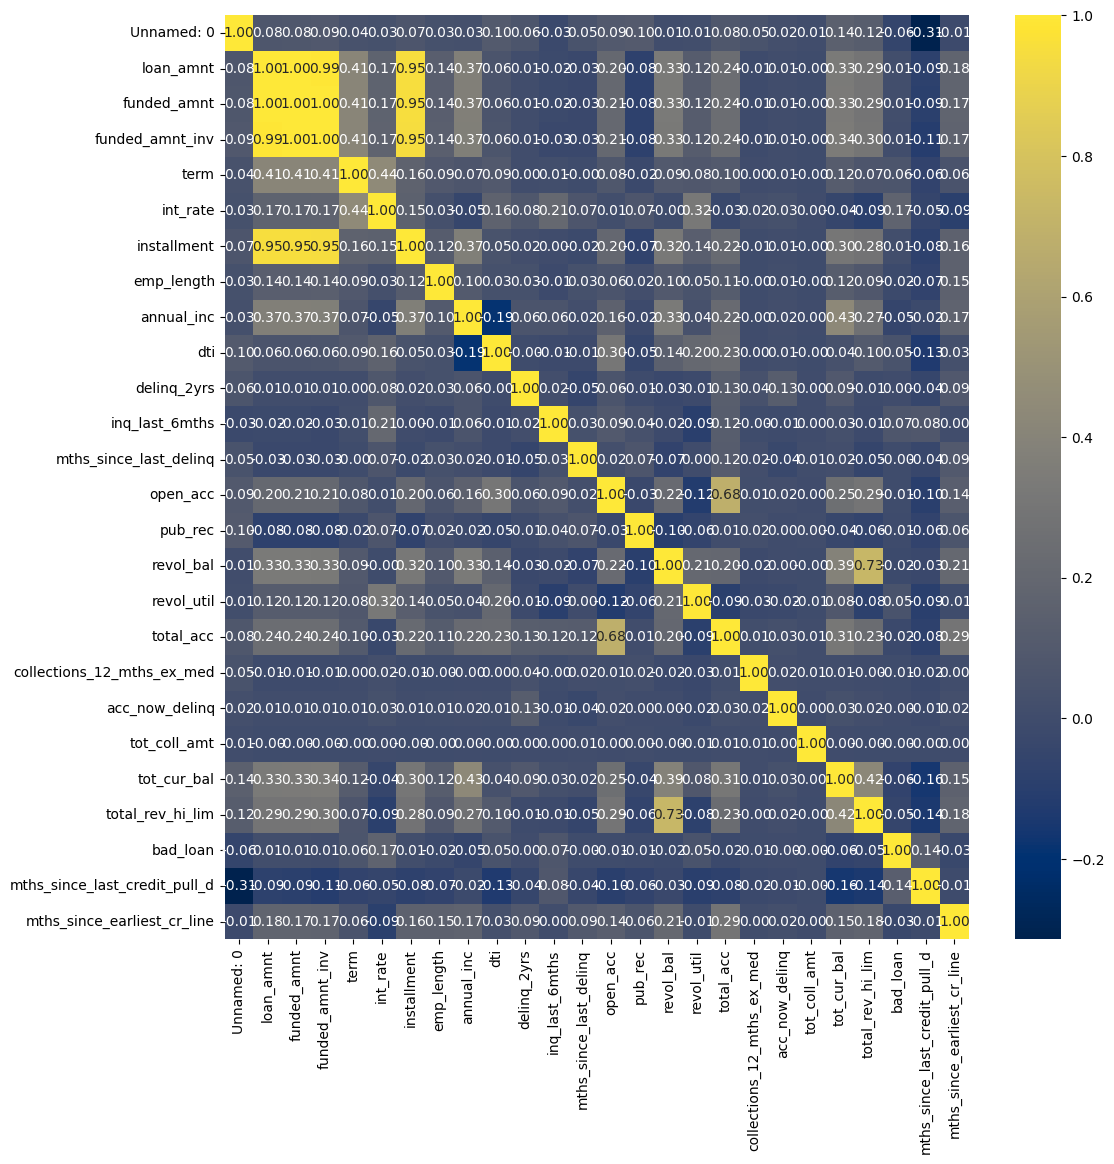

In [87]:
#korelasi pada matrix
corrMatrix = num_data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap="cividis")
plt.show()

### **Data Preparation**

Menangani nilai yang hilang, baik dengan menghapusnya
atau mengisi dengan teknik imputasi yang sesuai.

○ Mengatasi outlier jika diperlukan, entah dengan
menghapusnya atau menyesuaikan nilainya.

○ Melakukan encoding pada variabel kategorikal jika
diperlukan.

○ Melakukan scaling atau normalisasi pada fitur-fitur numerik
jika diperlukan.

○ Membagi data menjadi train set dan test set

In [62]:
data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [63]:
data = data.dropna()

In [64]:
data.isnull().sum()

Unnamed: 0          0.0
id                  0.0
member_id           0.0
loan_amnt           0.0
funded_amnt         0.0
                   ... 
all_util            0.0
total_rev_hi_lim    0.0
inq_fi              0.0
total_cu_tl         0.0
inq_last_12m        0.0
Length: 75, dtype: float64

In [65]:
data.duplicated().sum()

0

In [67]:
full_non_null = [col for col in data.columns if data[col].isnull().all()]
print(full_non_null)
print(len(full_non_null),"column(s)")

['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_

In [68]:
data = data.drop(axis=1, columns=full_non_null)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


In [17]:
def label_borrower(row):
    if row['loan_status'] == 'Fully Paid':
        return 'Good'
    elif row['loan_status'] == 'Current':
        return 'Good'
    else:
        return 'Bad'

data['label'] = data.apply(label_borrower, axis=1)

Masing-masing nilai dari variabel loan_status dapat dikategorikan sebagai good atau bad loan.

In [18]:
data['label'].value_counts()

label
Good    408965
Bad      57320
Name: count, dtype: int64

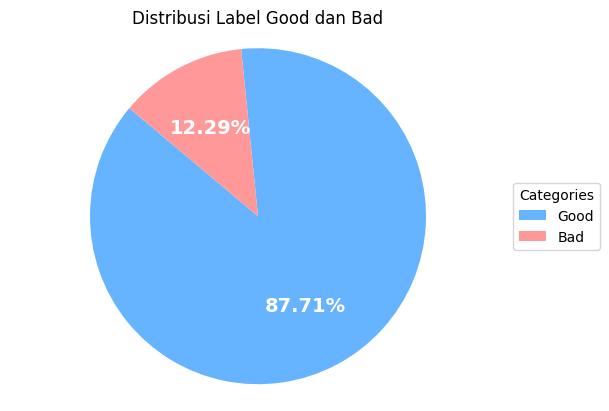

In [35]:
import matplotlib.pyplot as plt

# Data untuk pie chart
labels = ['Good', 'Bad']
sizes = [408965, 57320]
colors = ['#66b3ff', '#ff9999']  # Warna untuk setiap kategori

# Membuat pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes,
                                  colors=colors,
                                  autopct='%.2f%%',
                                  textprops={'color':'w', 'fontsize':14, 'weight':'bold'},
                                  startangle=140)

# Menambahkan keterangan (legend) di samping
ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mengatur aspek sehingga pie berbentuk lingkaran sempurna
ax.axis('equal')
plt.title('Distribusi Label Good dan Bad')
plt.show()

In [63]:
string_null = data.isnull().sum().sort_values(ascending=False)
print(string_null.to_string())

mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340304
mths_since_last_delinq         250351
total_rev_hi_lim                70276
tot_cur_bal                     70276
tot_coll_amt                    70276
emp_title                       27588
emp_length                      21008
revol_util                        340
collections_12_mths_ex_med        145
last_credit_pull_d                 42
earliest_cr_line                   29
total_acc                          29
pub_rec                            29
open_acc                           29
acc_now_delinq                     29
inq_last_6mths                     29
delinq_2yrs                        29
title                              21
annual_inc                          4
initial_list_status                 0
revol_bal                           0
policy_code                         0
application_type                    0
Unnamed: 0                          0
dti         

In [64]:
data['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [65]:
bad_status = [
    'Charged Off'
    , 'Default'
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['bad_loan'] = np.where(data['loan_status'].isin(bad_status), 1, 0)


data['bad_loan'].value_counts()

bad_loan
0    415317
1     50968
Name: count, dtype: int64

In [66]:
data.drop('loan_status', axis=1, inplace=True)

In [67]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [68]:
def emp_length_convert(df, column):
    data[column] = data[column].str.replace(' years', '').str.replace('+', '')
    data[column] = data[column].str.replace('< 1 year', str(0))
    data[column] = data[column].str.replace(' years', '')
    data[column] = data[column].str.replace(' year', '')
    data[column] = pd.to_numeric(data[column])
    data[column].fillna(value = 0, inplace = True)


emp_length_convert(data, 'emp_length')

data['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [69]:
def term_numeric(data, column):
    data[column] = pd.to_numeric(data[column].str.replace(' months', ''))

term_numeric(data, 'term')

In [70]:
data['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

In [71]:
def date_columns(data, column):
    #Mengatur tanggal referensi
    today_date = pd.to_datetime('2016-01-01')

    #konversi ke format date time
    data[column] = pd.to_datetime(data[column], format = "%b-%y")

    #kalkulasi selisih bulan dan membuat kolom baru
    data['mths_since_' + column] = round(pd.to_numeric((today_date - data[column]) / np.timedelta64(1, 'M')))

    #Membuat hasil yang bernilai negatif menjadi nilai maksimum
    data['mths_since_' + column] = data['mths_since_' + column].apply(lambda x: data['mths_since_' + column].max() if x < 0 else x)

    data.drop(columns = [column], inplace = True)

In [72]:
date_columns(data, 'last_credit_pull_d')

In [73]:
date_columns(data, 'earliest_cr_line')

In [74]:
total_rows = len(data)
missing_val = (data.isnull().sum() / total_rows * 100).sort_values(ascending=False)
print(missing_val[missing_val>70].to_string())

mths_since_last_record         86.566585
mths_since_last_major_derog    78.773926
desc                           72.981975


In [75]:
columns_to_drop = ['mths_since_last_record', 'mths_since_last_major_derog', 'desc']
data.drop(columns=columns_to_drop, inplace=True, axis=1)

In [76]:
string_null = data.isnull().sum().sort_values(ascending=False)
print(string_null.to_string())

mths_since_last_delinq           250351
total_rev_hi_lim                  70276
tot_cur_bal                       70276
tot_coll_amt                      70276
emp_title                         27588
revol_util                          340
collections_12_mths_ex_med          145
mths_since_last_credit_pull_d        42
total_acc                            29
open_acc                             29
pub_rec                              29
mths_since_earliest_cr_line          29
delinq_2yrs                          29
acc_now_delinq                       29
inq_last_6mths                       29
title                                21
annual_inc                            4
initial_list_status                   0
policy_code                           0
revol_bal                             0
application_type                      0
bad_loan                              0
Unnamed: 0                            0
dti                                   0
id                                    0


In [77]:
num_data = data.select_dtypes(exclude= 'object')
num_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'bad_loan', 'mths_since_last_credit_pull_d',
       'mths_since_earliest_cr_line'],
      dtype='object')

In [78]:
cat_data = data.select_dtypes(include= 'object')
cat_data.columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'initial_list_status', 'application_type'],
      dtype='object')

In [79]:
#missing handle for numerical
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)

data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['total_rev_hi_lim'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

#missing handle for categorical
data['emp_title'].fillna(data['emp_title'].mode()[0], inplace=True)
data['title'].fillna(data['title'].mode()[0], inplace=True)

In [80]:
string_null = data.isnull().sum().sort_values(ascending=False)
print(string_null.to_string())

mths_since_last_credit_pull_d    42
mths_since_earliest_cr_line      29
initial_list_status               0
inq_last_6mths                    0
mths_since_last_delinq            0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
collections_12_mths_ex_med        0
dti                               0
policy_code                       0
application_type                  0
acc_now_delinq                    0
tot_coll_amt                      0
tot_cur_bal                       0
total_rev_hi_lim                  0
bad_loan                          0
delinq_2yrs                       0
Unnamed: 0                        0
id                                0
zip_code                          0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                        

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     466285 non-null  int64  
 1   id                             466285 non-null  int64  
 2   member_id                      466285 non-null  int64  
 3   loan_amnt                      466285 non-null  int64  
 4   funded_amnt                    466285 non-null  int64  
 5   funded_amnt_inv                466285 non-null  float64
 6   term                           466285 non-null  int64  
 7   int_rate                       466285 non-null  float64
 8   installment                    466285 non-null  float64
 9   grade                          466285 non-null  object 
 10  sub_grade                      466285 non-null  object 
 11  emp_title                      466285 non-null  object 
 12  emp_length                    

In [82]:
data.nunique()[data.nunique() < 10].sort_values()

policy_code                   1
application_type              1
term                          2
initial_list_status           2
bad_loan                      2
verification_status           3
home_ownership                6
acc_now_delinq                6
grade                         7
collections_12_mths_ex_med    9
dtype: int64

In [83]:
columns_to_drop = ['url', 'member_id','id','sub_grade', 'title', 'zip_code', 'policy_code', 'emp_title', 'application_type']
data.drop(columns=columns_to_drop, inplace=True, axis=1)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     466285 non-null  int64  
 1   loan_amnt                      466285 non-null  int64  
 2   funded_amnt                    466285 non-null  int64  
 3   funded_amnt_inv                466285 non-null  float64
 4   term                           466285 non-null  int64  
 5   int_rate                       466285 non-null  float64
 6   installment                    466285 non-null  float64
 7   grade                          466285 non-null  object 
 8   emp_length                     466285 non-null  float64
 9   home_ownership                 466285 non-null  object 
 10  annual_inc                     466285 non-null  float64
 11  verification_status            466285 non-null  object 
 12  purpose                       

In [85]:
num_data = data.select_dtypes(exclude= 'object')
num_data.columns

Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'bad_loan',
       'mths_since_last_credit_pull_d', 'mths_since_earliest_cr_line'],
      dtype='object')

In [86]:
cat_data = data.select_dtypes(include= 'object')
cat_data.columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')

In [88]:
columns_to_drop = ['loan_amnt','funded_amnt','funded_amnt_inv']
data.drop(columns=columns_to_drop, inplace=True, axis=1)

In [89]:
data['grade'].value_counts()

grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64

In [90]:
grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}

cat_data['grade'] = cat_data['grade'].map(grade_map)

In [91]:
to_dummies = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']

dummies = pd.get_dummies(cat_data[to_dummies])
dummies.drop('initial_list_status_w', axis=1, inplace=True)


dummies.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [92]:
cat_data.drop(to_dummies, axis=1, inplace=True)
cat_data_f = pd.concat([cat_data, dummies], axis = 1)

In [93]:
num_data = data.select_dtypes(exclude= 'object')
num_data.columns

Index(['Unnamed: 0', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'bad_loan', 'mths_since_last_credit_pull_d',
       'mths_since_earliest_cr_line'],
      dtype='object')

In [94]:
final_data = pd.concat([num_data, cat_data_f], axis = 1).dropna().reset_index().drop('index', axis = 1)
final_data.head()

,Unnamed: 0,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,0,36,10.65,162.87,10.0,24000.0,27.65,0.0,1.0,-1.0,...,False,False,False,False,False,False,False,False,False,True
1,1,60,15.27,59.83,0.0,30000.0,1.00,0.0,5.0,-1.0,...,False,False,False,False,False,False,False,False,False,True
2,2,36,15.96,84.33,10.0,12252.0,8.72,0.0,2.0,-1.0,...,False,False,False,False,False,False,False,False,False,True
3,3,36,13.49,339.31,10.0,49200.0,20.00,0.0,1.0,35.0,...,False,False,False,False,False,False,False,False,False,True
4,4,60,12.69,67.79,1.0,80000.0,17.94,0.0,0.0,38.0,...,False,False,False,False,False,False,False,False,False,True


In [95]:
X = final_data.drop('bad_loan', axis = 1)
y = final_data['bad_loan']

###**Data Modelling**

○ Memilih model machine learning yang sesuai dengan jenis
masalah dan tujuan yang ingin dicapai.

○ Melakukan pelatihan model pada set pelatihan.

○ Menyesuaikan parameter model menggunakan teknik
seperti cross-validation atau grid search.

In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [97]:
param_grid = {
    'C': [0.001, 0.01, 0.1]
}

In [101]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8,p=2,metric='euclidean')
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X,y)

classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [102]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

###**Evaluation**

○ Melakukan evaluasi kinerja model terhadap set data

○ Menganalisis metrik evaluasi yang diperoleh untuk
mengevaluasi seberapa baik model bekerja.

○ Menyusun ringkasan dari hasil evaluasi

In [98]:
logreg = LogisticRegression()

grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search_logreg.fit(X_train, y_train)

print("Best Parameter:", grid_search_logreg.best_params_)

best_logreg = grid_search_logreg.best_estimator_

y_pred_logreg = best_logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Akurasi Model:", accuracy_logreg)
print("Akurasi Model: {:.2%}".format(accuracy_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameter: {'C': 0.001}
Akurasi Model: 0.8903657097915847
Akurasi Model: 89.04%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    124532
           1       0.33      0.00      0.00     15333

    accuracy                           0.89    139865
   macro avg       0.61      0.50      0.47    139865
weighted avg       0.83      0.89      0.84    139865



In [103]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[124351,    181],
       [ 15286,     47]])

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    124532
           1       0.21      0.00      0.01     15333

    accuracy                           0.89    139865
   macro avg       0.55      0.50      0.47    139865
weighted avg       0.82      0.89      0.84    139865



In [100]:
from sklearn.tree import DecisionTreeClassifier

dcs_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(dcs_tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_dcs_tree = grid_search.best_estimator_

y_pred = best_dcs_tree.predict(X_test)
accuracy_dcs = accuracy_score(y_test, y_pred)

print("Akurasi Model:", accuracy_dcs)
print("Akurasi Model: {:.2%}".format(accuracy_dcs))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Akurasi Model: 0.8903728595431308
Akurasi Model: 89.04%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    124532
           1       0.00      0.00      0.00     15333

    accuracy                           0.89    139865
   macro avg       0.45      0.50      0.47    139865
weighted avg       0.79      0.89      0.84    139865



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
